In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
data = pd.read_csv('Time_Mesure.csv')
n = len(data['File Name'])
rang = list(range(n))
tim = data['Time']

full_size = data['Shape']
full_size = [x[1:len(x)-1] for x in full_size]
full_size = [tuple(map(int, x.split(','))) for x in full_size]
cols_size = np.array([x[1] for x in full_size])
rows_size = np.array([x[0] for x in full_size])
full_size = np.array([x[0]*x[1] for x in full_size])

rmse = data['RMSE']
psnr = data['PSNR']
ssim = data['SSIM']

## Time Messure of EMD-2D: 

([], [])

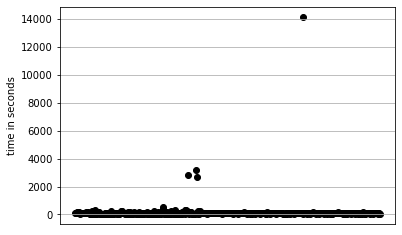

In [2]:
plt.grid()
plt.ylabel('time in seconds')
plt.scatter(rang, tim, c='black')
plt.xticks([])

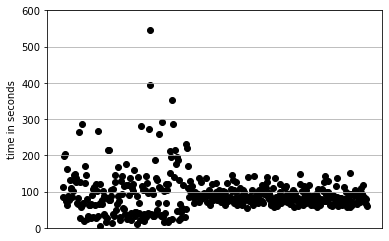

In [3]:
plt.ylim(0, 600)
plt.grid()
plt.ylabel('time in seconds')
plt.xticks([])
plt.scatter(rang, tim, cmap=cm.binary, c='black')

(array([ 66., 294.,  57.,  12.,   8.,   1.,   1.,   0.,   0.,   1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

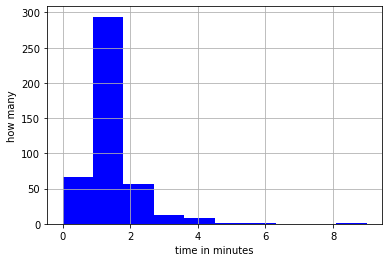

In [4]:
tims = np.zeros(10)
k = 60
for i in range(10):
    p1 = tim <= k
    p2 = tim > k-60
    tims[i] = (p1 & p2).sum()
    k+=60
plt.grid()
plt.xlabel('time in minutes')
plt.ylabel('how many')
plt.hist(list(range(10)), cumulative = False, color='b', weights = tims)

<AxesSubplot:xlabel='Time'>

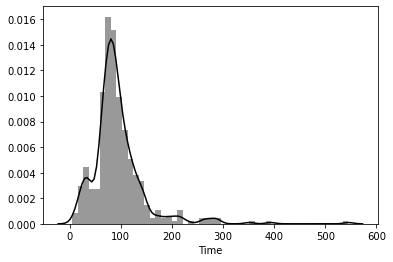

In [5]:
sns.distplot(data['Time'].loc[data['Time'] < 1000], color='black')

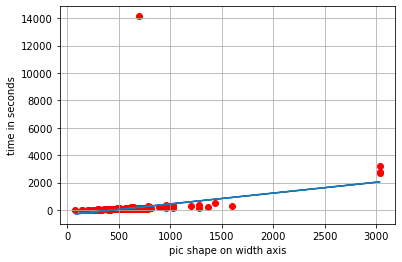

In [6]:
plt.grid()
plt.ylabel('time in seconds')
plt.xlabel('pic shape on width axis')
plt.scatter(cols_size, tim, c='r')
m,b = np.polyfit(cols_size, tim, 1)
plt.plot(cols_size, m*cols_size + b)

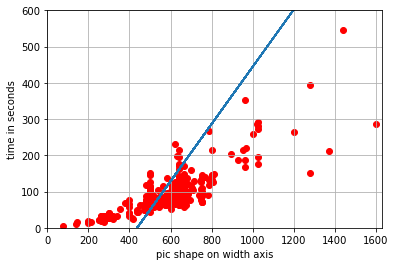

In [7]:
plt.grid()
plt.ylim(0, 600)
plt.xlim(0, 1630)
plt.ylabel('time in seconds')
plt.xlabel('pic shape on width axis')
plt.scatter(cols_size, tim, c='r')
m,b = np.polyfit(cols_size, tim, 1)
plt.plot(cols_size, m*cols_size + b)

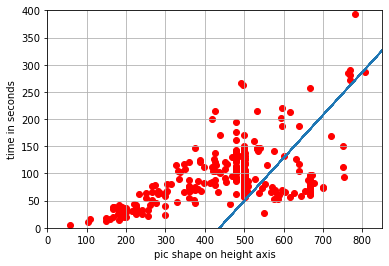

In [8]:
plt.grid()
plt.ylim(0, 400)
plt.xlim(0, 850)
plt.ylabel('time in seconds')
plt.xlabel('pic shape on height axis')
plt.scatter(rows_size, tim, c='r')
m,b = np.polyfit(cols_size, tim, 1)
plt.plot(cols_size, m*cols_size + b)

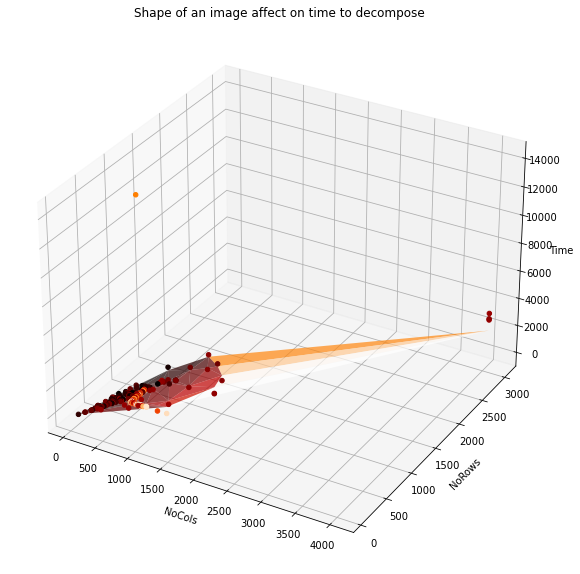

In [9]:
fig = plt.figure(figsize=(10, 10))
shape = np.array([rows_size, cols_size]).T
reg_plane = np.linalg.solve(np.dot(shape.T, shape), np.dot(shape.T, tim))
reg_plane = np.dot(shape, reg_plane)
c = np.arange(len(tim))
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('NoRows')
ax.set_xlabel('NoCols')
ax.set_title('Shape of an image affect on time to decompose')
ax.set_zlabel('Time')
ax.scatter(rows_size, cols_size, tim, cmap='gist_heat',c=c,alpha = 1)
ax.plot_trisurf(rows_size, cols_size, reg_plane,alpha=0.7, cmap='gist_heat')

# Correlation Matrix:

In [10]:
data['rows'] = rows_size
data['cols'] = cols_size
data.corr()

,No IMFs,Time,RMSE,PSNR,SSIM,rows,cols
No IMFs,1.000000,0.137412,-0.115355,-0.174169,-0.225099,0.616268,0.659020
Time,0.137412,1.000000,0.008455,-0.010325,-0.054243,0.307024,0.297086
RMSE,-0.115355,0.008455,1.000000,0.621864,0.506081,-0.053664,0.008865
PSNR,-0.174169,-0.010325,0.621864,1.000000,0.755248,-0.097703,-0.034929
SSIM,-0.225099,-0.054243,0.506081,0.755248,1.000000,-0.139242,-0.126144
rows,0.616268,0.307024,-0.053664,-0.097703,-0.139242,1.000000,0.870410
cols,0.659020,0.297086,0.008865,-0.034929,-0.126144,0.870410,1.000000


# RMSE of EMD-2D:

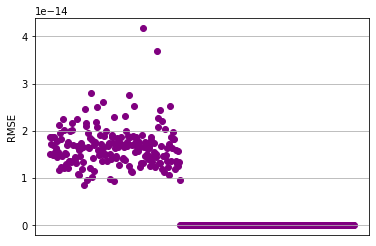

In [11]:
plt.grid()
plt.ylabel('RMSE')
plt.xticks([])
plt.scatter(rang, rmse, c='purple')

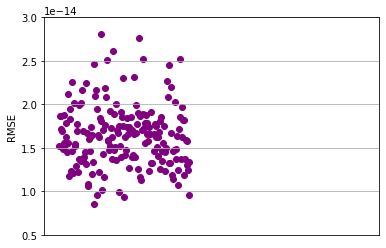

In [12]:
plt.grid()
plt.ylabel('RMSE')
plt.xticks([])
plt.ylim(0.5*10**-14,3*10**-14)
plt.scatter(rang, rmse, c='purple')

<AxesSubplot:xlabel='RMSE'>

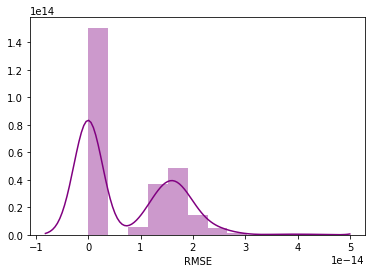

In [13]:
sns.distplot(data['RMSE'], color='purple')


# PSNR of EMD-2D:

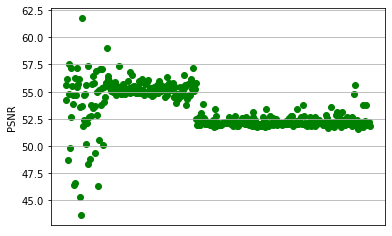

In [14]:
plt.grid()
plt.xticks([])
plt.ylabel('PSNR')
plt.scatter(rang, psnr, c='g')

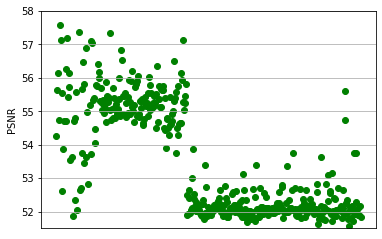

In [15]:
plt.grid()
plt.ylabel('PSNR')
plt.xticks([])
plt.ylim(51.5, 58)
plt.scatter(rang, psnr, c='g')

<AxesSubplot:xlabel='PSNR'>

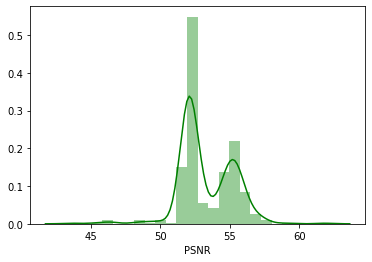

In [16]:
sns.distplot(data['PSNR'], color='g')


# SSIM of EMD-2D:

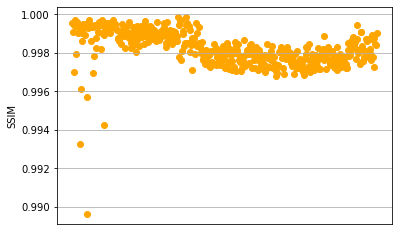

In [17]:
plt.grid()
plt.ylabel('SSIM')
plt.xticks([])
plt.scatter(rang, ssim, c='orange')

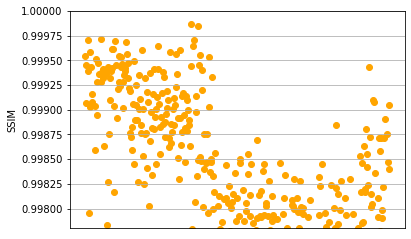

In [18]:
plt.grid()
plt.ylabel('SSIM')
plt.ylim(0.9978)
plt.xticks([])
plt.scatter(rang, ssim, c='orange')

<AxesSubplot:xlabel='SSIM'>

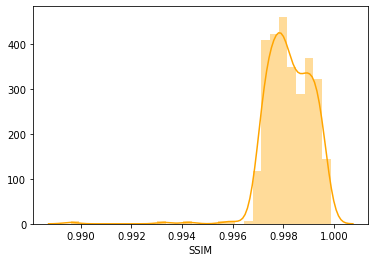

In [19]:
sns.distplot(data['SSIM'], color='orange')
